In [1]:
%reload_ext autoreload
%autoreload 2

# Add src directory to PYTHONPATH
import sys
sys.path.append("../src/")

In [5]:
import torch
from torch import nn, jit
import matplotlib.pyplot as plt
import numpy as np

from saccade import RNN_Plant

# task var: delay ,  speed = tau ?


In [44]:
    
def train(model, optim, batch, seq_length, epoch):
    losses = []
    for i in range(epoch):
        optim.zero_grad()
        loss, sim_result = model(batch, seq_length) #(rule = rule_train_now, batch_size = hp['batch_size_train'])
        loss.backward()
        optim.step()
        losses.append(loss.item())        
    return losses


def plot_results(model, seq_length):

    loss, history = model(batch = 1, seq_length = seq_length) #(rule = rule_train_now, batch_size = hp['batch_size_train'])
    state, hidden, go, target, target_go = history

    plt.plot(go[:,0,:])
    # plt.plot(target[:,0])
    plt.plot(target_go[:,0])
    plt.plot(state[:,0,:2])
    
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    # plt.plot(target_go[:,0] - state[:,0,:2])
    # plt.plot(state[:,0,2:4]*3)
    # plt.show()

    plt.imshow(hidden[:,0,:].T)
    plt.show()
    
    # input = Target, pos, vel
    plot_weights(model.rnn.in_layer, model.rnn_type, transpose=True)
    plot_weights(model.rnn.rec_layer, model.rnn_type, transpose=True)
    plot_weights(model.rnn.out_layer, model.rnn_type, transpose=False)


def plot_weights(layer, rnn_type, transpose = False):
    if rnn_type == 'active':
        weight = layer.active_weight
    
        n_output = weight.n_output
        n_input = weight.n_input
        w_passive = weight.w_passive
        w_active = weight.w_active

        if transpose:
            plt.imshow(w_passive.view(n_output,n_input).detach().t());        plt.show()
            plt.imshow(w_active.view(n_output,n_input).detach().t());         plt.show()
            plt.imshow((w_passive.view(n_output,n_input) + w_active.view(n_output,n_input)).detach().t());        plt.show()    

        else:
            plt.imshow(w_passive.view(n_output,n_input).detach());        plt.show()
            plt.imshow(w_active.view(n_output,n_input).detach());        plt.show()
            plt.imshow((w_passive.view(n_output,n_input) + w_active.view(n_output,n_input)).detach());        plt.show()
        
    elif rnn_type == 'passive':
        weight = layer.weight
        if transpose:
            plt.imshow(weight.detach().t());        plt.show()
        else:
            plt.imshow(weight.detach());        plt.show()
    
#         n_output = weight.n_output
#         n_input = weight.n_input
#         w_passive = weight.w_passive
#         w_active = weight.w_active

#         if transpose:
#             plt.imshow(w_passive.view(n_output,n_input).detach().t());        plt.show()
#             plt.imshow(w_active.view(n_output,n_input).detach().t());         plt.show()
#             plt.imshow((w_passive.view(n_output,n_input) + w_active.view(n_output,n_input)).detach().t());        plt.show()    

#         else:
#             plt.imshow(w_passive.view(n_output,n_input).detach());        plt.show()
#             plt.imshow(w_active.view(n_output,n_input).detach());        plt.show()
#             plt.imshow((w_passive.view(n_output,n_input) + w_active.view(n_output,n_input)).detach());        plt.show()
        
        

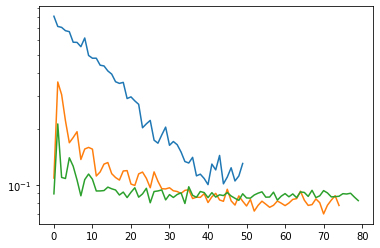

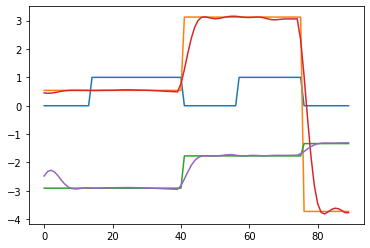

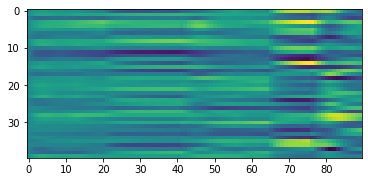

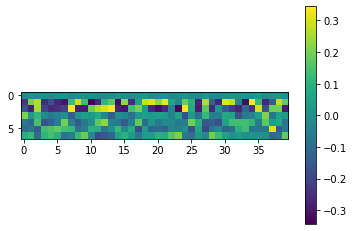

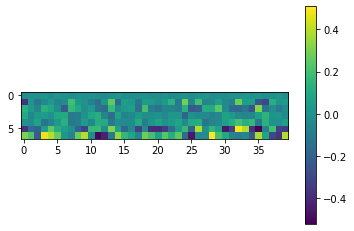

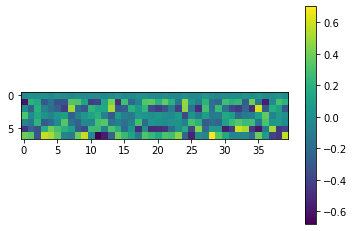

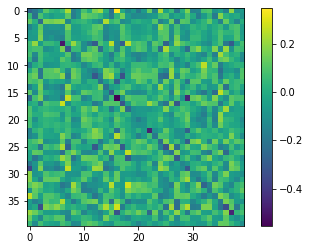

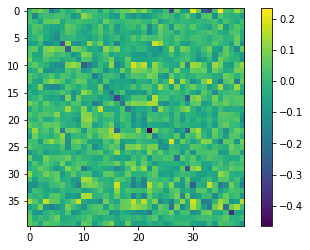

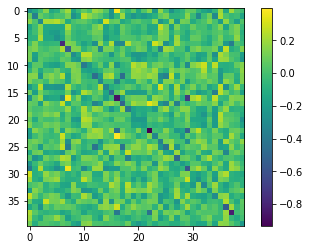

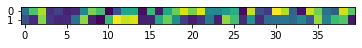

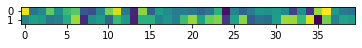

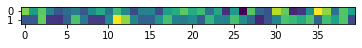

In [29]:
# # model_active = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = None, rnn_type = 'active')
# model_active = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = nn.ReLU(), rnn_type = 'active')
# # model_active = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = nn.CELU(), rnn_type = 'active')

model_active = RNN_Plant(n_rnn=40, tau=1, decay=0.9, nonlinearity = nn.Tanh(), rnn_type = 'active')


optim = torch.optim.Adam(model_active.parameters(), lr=0.016, weight_decay = 0.003)
losses = train(model_active, optim, batch = 30, seq_length = 2, epoch = 50)
plt.semilogy(losses)

optim = torch.optim.Adam(model_active.parameters(), lr=0.012, weight_decay = 0) 
losses = train(model_active, optim, batch = 60, seq_length = 3, epoch = 60)
plt.semilogy(losses)

optim = torch.optim.Adam(model_active.parameters(), lr=0.005, weight_decay = 0) 
losses = train(model_active, optim, batch = 100, seq_length = 4, epoch = 80)
plt.semilogy(losses)

plt.show()

plot_results(model_active, seq_length = 3)

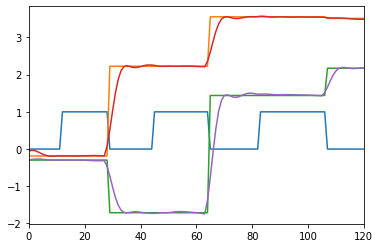

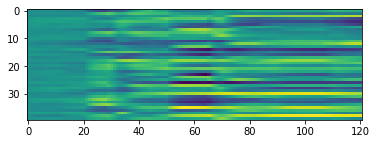

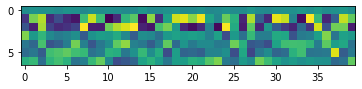

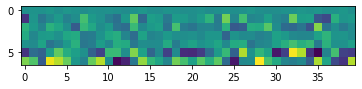

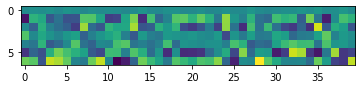

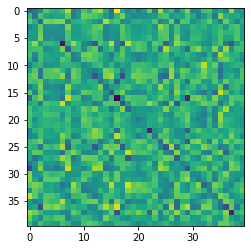

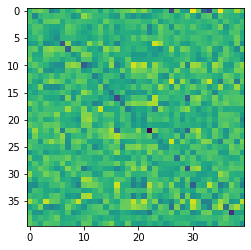

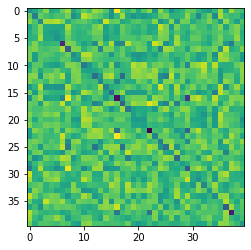

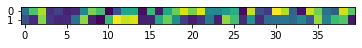

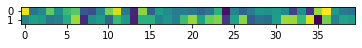

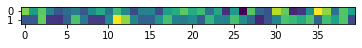

In [35]:

plot_results(model_active, seq_length = 4)

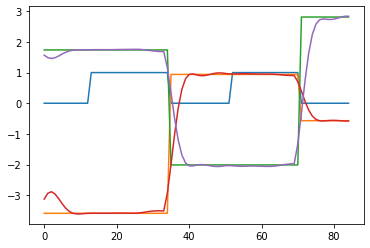

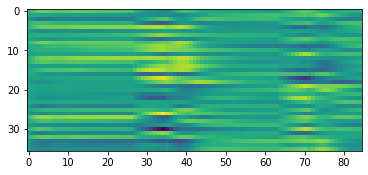

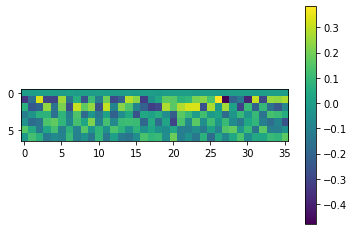

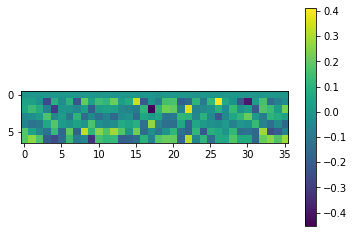

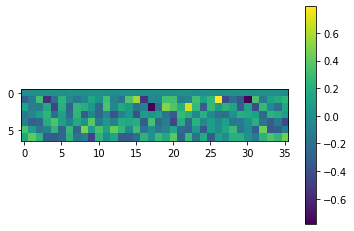

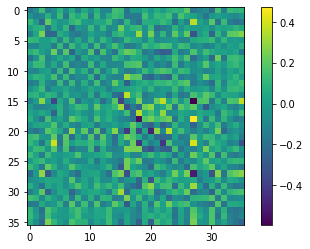

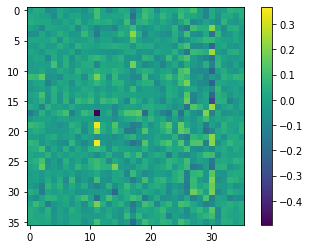

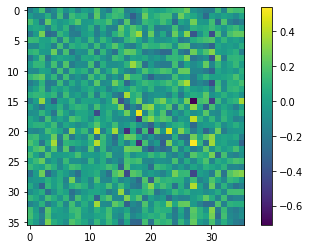

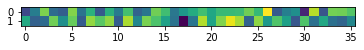

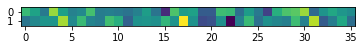

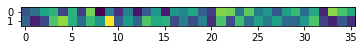

In [26]:

plot_results(model_active, seq_length = 3)

# Passive case

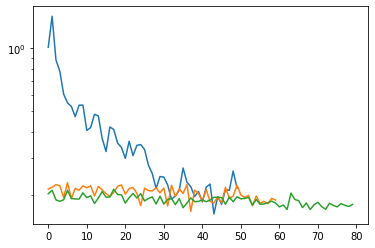

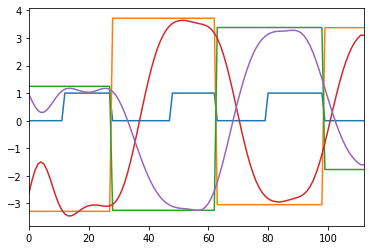

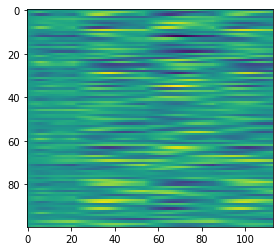

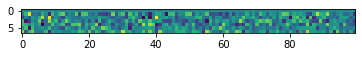

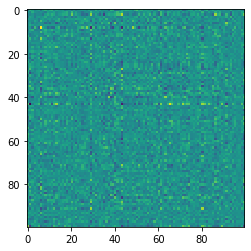

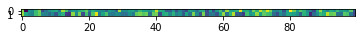

In [50]:
model_passive = RNN_Plant(n_rnn=30, tau=1, decay=0.9, nonlinearity = nn.Tanh(), rnn_type = 'passive')

optim = torch.optim.Adam(model_passive.parameters(), lr=0.016, weight_decay = 0.003)
losses = train(model_passive, optim, batch = 30, seq_length = 2, epoch = 50)
plt.semilogy(losses)

# optim = torch.optim.Adam(model_passive.parameters(), lr=0.012, weight_decay = 0) 
losses = train(model_passive, optim, batch = 60, seq_length = 3, epoch = 60)
plt.semilogy(losses)

# optim = torch.optim.Adam(model_passive.parameters(), lr=0.005, weight_decay = 0) 
losses = train(model_passive, optim, batch = 100, seq_length = 4, epoch = 80)
plt.semilogy(losses)

plt.show()

plot_results(model_passive, seq_length = 4)

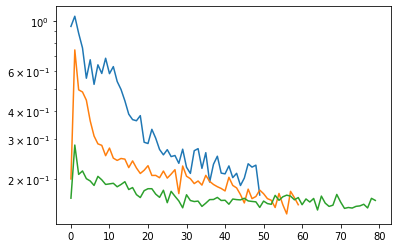

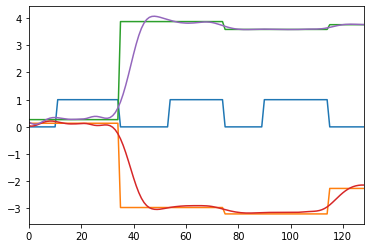

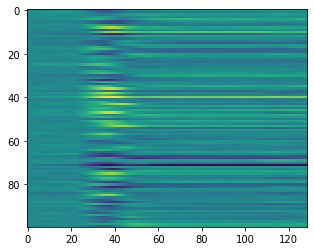

NameError: name 'self' is not defined

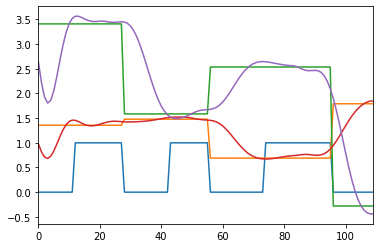

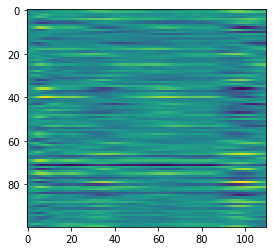

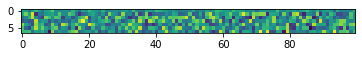

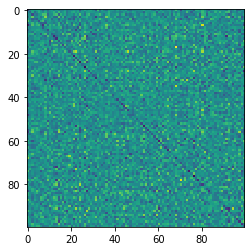

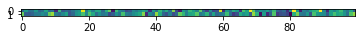

In [49]:

plot_results(model_passive, seq_length = 4)

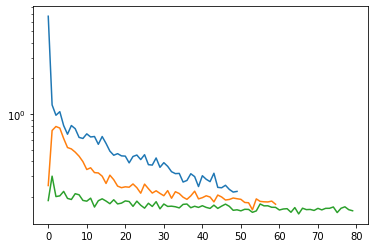

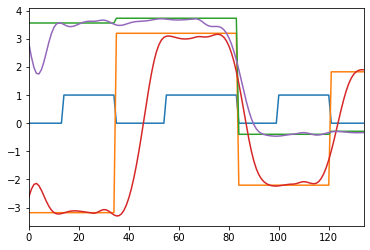

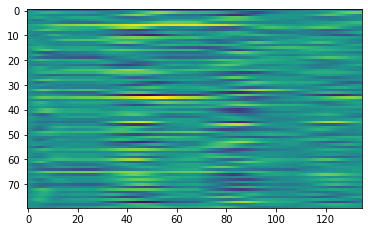

AttributeError: 'NoneType' object has no attribute 'active_weight'

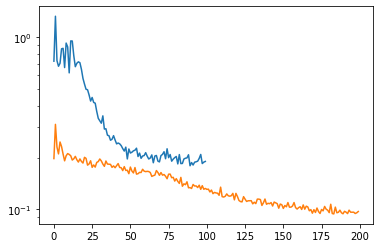

In [312]:

# model_passive = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = nn.ReLU(), rnn_type = 'passive')
# model_passive = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = nn.Tanh(), rnn_type = 'passive')
# model_passive = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = nn.CELU(), rnn_type = 'passive')
model_passive = RNN_Plant_Layer(n_rnn=40, tau=1, nonlinearity = None, rnn_type = 'passive')

simulator = Simulator(model_passive)

optim = torch.optim.Adam(model_passive.parameters(), lr=0.005, weight_decay = 0.003)
losses = train(simulator, optim, batch = 100, epoch = 100)
plt.semilogy(losses)

optim = torch.optim.Adam(model_passive.parameters(), lr=0.002, weight_decay = 0) 
losses = train(simulator, optim, batch = 200, epoch = 200)
plt.semilogy(losses)

optim = torch.optim.Adam(model_passive.parameters(), lr=0.002, weight_decay = 0) 
losses = train(simulator, optim, batch = 200, epoch = 200)
plt.semilogy(losses)

plt.show()

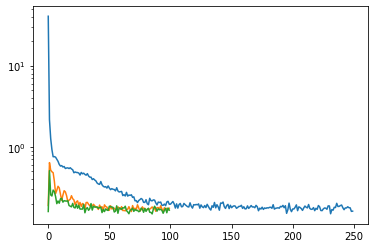

In [172]:
# linear

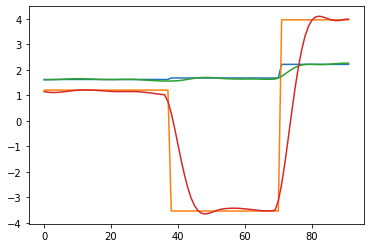

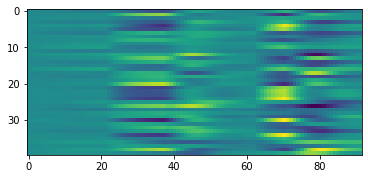

In [335]:
loss, state, hidden, go, target, target_go = model_passive(batch) #(rule = rule_train_now, batch_size = hp['batch_size_train'])

# plt.plot(go[:,1,:])
# plt.plot(target[:,0])

plt.plot(target_go[:,0])
plt.plot(state[:,0,:2])
plt.show()

# plt.plot(target_go[:,0] - state[:,0,:2])
# plt.plot(state[:,0,2:4]*3)
# plt.show()

plt.imshow(hidden[:,0,:].T)
plt.show()

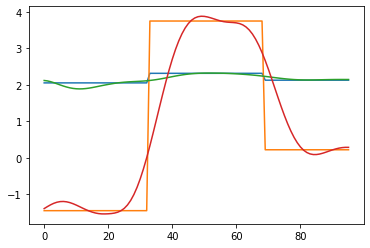

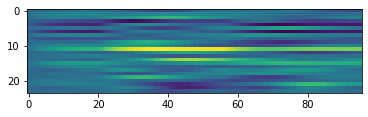

In [177]:
# linear

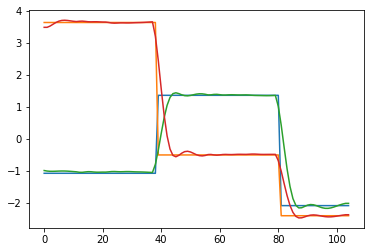

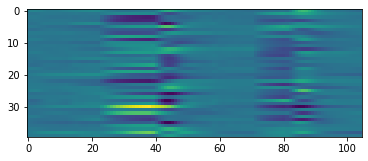